In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [2]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-25 06:17:22--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   166MB/s    in 0.6s    

2024-03-25 06:17:22 (166 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1


In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-fiqe0fmm
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-fiqe0fmm
  Resolved https://github.com/ersilia-os/ersilia.git to commit 7d3908e1859eb5e518eb57109e2b66fd26b4798b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 670 kB 4.0 MB/s 
     |████████████████████████████████| 148 kB 46.4 MB/s 
     |████████████████████████████████| 4.3 MB 43.8 MB/s 
     |████████████████████████████████| 97 kB 8.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 58 kB 6.4 MB/s 
     |████████████████████████████████| 421 kB 62.3 MB/s 
     |████████████████████████████████| 139 kB 53.4 MB/s 
     |████████████████████████████████| 9.9 MB 51.1 MB/s 
     |█████████

In [4]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
import sys

In [6]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [7]:
## Mount google drive
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
# specifying my input folder

input_folder = "/content/drive/MyDrive/Ersilia"

In [10]:
# specifying my output folder

output_folder = "/content/drive/MyDrive/Ersilia"

Downloading the eos6oli model from Ersilia

In [11]:
model_name = "eos6oli"

Fetching the model

In [12]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-zi_7oet5
Solving environment: / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.3.11  |       h06a430

Serving the model

In [13]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:33193
   PID: 4097
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


# Checking for data leakage

Reading in the actual training dataset used by authors

In [14]:
# specify the name of my input csv file

input_filename = "aqsol"

In [15]:
# specify the SMILES column name
smiles_column = "smiles"

In [16]:
# Extracting SMILES to a list
import pandas as pd

In [17]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df1 = pd.read_csv(path)
training_smiles = df1[smi_col].tolist()

print("The training dataset contains" + " " + str(len(training_smiles)) + " " + "SMILES")

The training dataset contains 9982 SMILES


Reading in the external dataset with sufficient experimental results

In [18]:
# specify the name of my input csv file

input_filename = "aqua_stand"

In [19]:
# specify the SMILES column name
smiles_column = "smiles"

In [20]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
external_smiles = df[smi_col].tolist()

print("The external dataset contains" + " " + str(len(external_smiles)) + " " + "SMILES")

The external dataset contains 1310 SMILES


In [21]:
df

,smiles,logS,weight
0,BrC(Br)(Br)Br,-3.14,1.0
1,BrC(Br)Br,-1.91,1.0
2,BrC1CCCCC1,-2.30,1.0
3,BrC=CBr,-1.32,1.0
4,BrCBr,-1.17,1.0
...,...,...,...
1305,c1ccoc1,-0.82,1.0
1306,c1ccsc1,-1.45,1.0
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0
1308,c1cnc2ncncc2n1,0.02,1.0


Comparing the training and external dataset to be sure there is no data leakage

In [22]:
def check_for_leaks(external_smiles, training_smiles):
    leaks = []
    for smile in external_smiles:
        if smile in training_smiles:
            print(f"The molecule {smile} is a leak.")
            leaks.append(smile)
    return leaks

leak_items = check_for_leaks(external_smiles, training_smiles)
total_leaks = len(leak_items)
print(f"Total number of leaks found: {total_leaks}")

if not leak_items:
    print("No leaks found.")

The molecule BrC(Br)(Br)Br is a leak.
The molecule BrC(Br)Br is a leak.
The molecule BrC1CCCCC1 is a leak.
The molecule BrC=CBr is a leak.
The molecule BrCBr is a leak.
The molecule BrCCBr is a leak.
The molecule BrCCCBr is a leak.
The molecule Brc1ccc(Br)c(Br)c1 is a leak.
The molecule Brc1ccc(Br)cc1 is a leak.
The molecule Brc1ccc2ccccc2c1 is a leak.
The molecule Brc1cccc(Br)c1 is a leak.
The molecule Brc1cccc(Br)c1Br is a leak.
The molecule Brc1cccc2ccccc12 is a leak.
The molecule Brc1ccccc1 is a leak.
The molecule Brc1ccccc1Br is a leak.
The molecule C1CCCC1 is a leak.
The molecule C1CCCCC1 is a leak.
The molecule C1CCCCCC1 is a leak.
The molecule C1CCCCCCC1 is a leak.
The molecule C1CCNCC1 is a leak.
The molecule C1CCOCC1 is a leak.
The molecule C1CNCCN1 is a leak.
The molecule C1COCCN1 is a leak.
The molecule C=CC#N is a leak.
The molecule C=CC=C is a leak.
The molecule C=CC=O is a leak.
The molecule C=CCC1(CC=C)C(=O)NC(=O)NC1=O is a leak.
The molecule C=CCC=C is a leak.
The mole

Deleting the leaks

In [23]:

# Check if 'smiles' values in external_df is in the list of leak_items
mask = df['smiles'].isin(leak_items)

# Invert the mask to keep rows where the 'smiles' values is not a leak
noLeaks_df = df[~mask]


In [24]:
noLeaks_df

,smiles,logS,weight
15,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0
16,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0
17,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0
18,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0
19,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0
...,...,...,...
1303,c1ccncc1,0.76,1.0
1305,c1ccoc1,-0.82,1.0
1306,c1ccsc1,-1.45,1.0
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0


Preprocessing: Checking if SMILES are in standard form

In [25]:
import rdkit
from rdkit import Chem

def is_smiles(smiles):
  try:
    mol=Chem.MolFromSmiles(smiles)
    if mol is None:
      return False
    return True
  except:
    return False

In [26]:
for i in noLeaks_df['smiles']:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")

Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

Generating InchiKey

In [27]:
# Function to convert SMILES to InChIKey
def smiles_to_inchikey(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    inchi = Chem.MolToInchi(mol)
    inchi_key = Chem.InchiToInchiKey(inchi)
    return inchi_key

In [28]:
noLeaks_df.loc[:, 'inchikey'] = noLeaks_df['smiles'].apply(smiles_to_inchikey)

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Charges were rearranged; Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00] WARNING: Omitted undefined stereo

[06:25:00

In [29]:
noLeaks_df

,smiles,logS,weight,inchikey
15,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0,BYYMILHAKOURNM-UHFFFAOYSA-N
16,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0,CHNXZKVNWQUJIB-UHFFFAOYSA-N
17,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0,VIKNJXKGJWUCNN-UHFFFAOYSA-N
18,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0,BFPYWIDHMRZLRN-UHFFFAOYSA-N
19,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0,IMONTRJLAWHYGT-UHFFFAOYSA-N
...,...,...,...,...
1303,c1ccncc1,0.76,1.0,JUJWROOIHBZHMG-UHFFFAOYSA-N
1305,c1ccoc1,-0.82,1.0,YLQBMQCUIZJEEH-UHFFFAOYSA-N
1306,c1ccsc1,-1.45,1.0,YTPLMLYBLZKORZ-UHFFFAOYSA-N
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0,OZKOMUDCMCEDTM-UHFFFAOYSA-N


In [30]:
noLeaks_df.to_csv('/content/drive/MyDrive/Ersilia/noLeaks_data.csv', index=False)

Reading in the no-leaks dataset

In [31]:
# specify the name of my input csv file

input_filename = "noLeaks_data"

In [32]:
# specify the SMILES column name
smiles_column = "smiles"

In [33]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 794 SMILES


In [34]:

df

,smiles,logS,weight,inchikey
0,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0,BYYMILHAKOURNM-UHFFFAOYSA-N
1,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0,CHNXZKVNWQUJIB-UHFFFAOYSA-N
2,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0,VIKNJXKGJWUCNN-UHFFFAOYSA-N
3,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0,BFPYWIDHMRZLRN-UHFFFAOYSA-N
4,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0,IMONTRJLAWHYGT-UHFFFAOYSA-N
...,...,...,...,...
789,c1ccncc1,0.76,1.0,JUJWROOIHBZHMG-UHFFFAOYSA-N
790,c1ccoc1,-0.82,1.0,YLQBMQCUIZJEEH-UHFFFAOYSA-N
791,c1ccsc1,-1.45,1.0,YTPLMLYBLZKORZ-UHFFFAOYSA-N
792,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0,OZKOMUDCMCEDTM-UHFFFAOYSA-N


In [35]:
 #Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 51.25 seconds


In [36]:
# Check the results

print(output.head())

                           key                                        input  \
0  BYYMILHAKOURNM-UHFFFAOYSA-N                C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1   
1  CHNXZKVNWQUJIB-UHFFFAOYSA-N     C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C   
2  VIKNJXKGJWUCNN-UHFFFAOYSA-N        C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
3  BFPYWIDHMRZLRN-UHFFFAOYSA-N          C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C   
4  IMONTRJLAWHYGT-UHFFFAOYSA-N  C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   

   solubility  
0      -3.441  
1      -4.725  
2      -4.412  
3      -4.306  
4      -5.915  


In [37]:
#Save the results in Google Drive


output.to_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv", index=False)

In [38]:

ErsiliaEvaluation=pd.read_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv")
ErsiliaEvaluation.head()

,key,input,solubility
0,BYYMILHAKOURNM-UHFFFAOYSA-N,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.441
1,CHNXZKVNWQUJIB-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-4.725
2,VIKNJXKGJWUCNN-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.412
3,BFPYWIDHMRZLRN-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.306
4,IMONTRJLAWHYGT-UHFFFAOYSA-N,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-5.915


In [39]:
#matching outputs with smiles and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(ErsiliaEvaluation, df[['smiles', 'logS']], how='left', left_on='input', right_on='smiles')

# Renaming and dropping redundant columns
merged_predictions = merged_predictions.rename(columns={'logS': 'experimental_solubility'})
merged_predictions = merged_predictions.rename(columns={'solubility': 'predicted_solubility'})
merged_predictions = merged_predictions.drop(columns='smiles', axis=1)

# Displaying the result
print(merged_predictions)

                             key                                        input  \
0    BYYMILHAKOURNM-UHFFFAOYSA-N                C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1   
1    CHNXZKVNWQUJIB-UHFFFAOYSA-N     C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C   
2    VIKNJXKGJWUCNN-UHFFFAOYSA-N        C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
3    BFPYWIDHMRZLRN-UHFFFAOYSA-N          C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C   
4    IMONTRJLAWHYGT-UHFFFAOYSA-N  C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
..                           ...                                          ...   
803  JUJWROOIHBZHMG-UHFFFAOYSA-N                                     c1ccncc1   
804  YLQBMQCUIZJEEH-UHFFFAOYSA-N                                      c1ccoc1   
805  YTPLMLYBLZKORZ-UHFFFAOYSA-N                                      c1ccsc1   
806  OZKOMUDCMCEDTM-UHFFFAOYSA-N                       c1cnc2c(c1)ccc1ncccc12   
807  CPNGPNLZQNNVQM-UHFFFAOYSA-N                               c1cnc2ncncc2n1   

     predicted_solubility  

In [40]:
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_ErsiliaValidation.csv", index=False)

In [41]:

from sklearn.metrics import r2_score


r2 = r2_score(merged_predictions['experimental_solubility'], merged_predictions['predicted_solubility'])
print(f'R-squared (R2): {r2:.2f}')

R-squared (R2): 0.88


PCA of Morgan Fingerprints

In [42]:
noLeaks_df=pd.read_csv("/content/drive/MyDrive/Ersilia/noLeaks_data.csv")

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  9982 non-null   object 
 1   y       9982 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.1+ KB


In [44]:
noLeaks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   smiles    794 non-null    object 
 1   logS      794 non-null    float64
 2   weight    794 non-null    float64
 3   inchikey  794 non-null    object 
dtypes: float64(2), object(2)
memory usage: 24.9+ KB


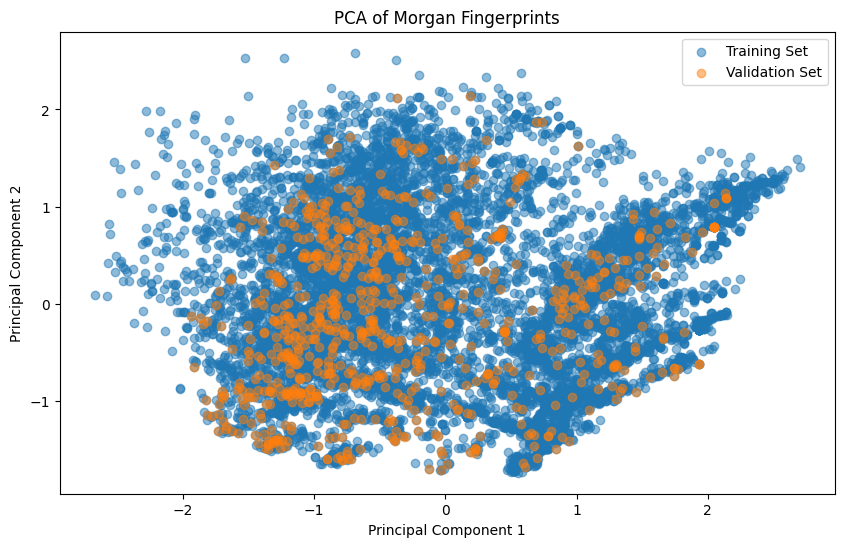

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import ConvertToNumpyArray

# Function to generate Morgan fingerprints for a list of molecules
def generate_morgan_fingerprints(smiles_list, radius=2, n_bits=2048):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    fingerprints = []
    for mol in mols:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        arr = np.zeros((1,), dtype=int)  # Corrected here
        ConvertToNumpyArray(fp, arr)
        fingerprints.append(arr)

    return np.array(fingerprints)



# Convert molecules to Morgan fingerprints
training_fingerprints = generate_morgan_fingerprints(df1['smiles'])
validation_fingerprints = generate_morgan_fingerprints(noLeaks_df['smiles'])


# Concatenate fingerprints from both sets
all_fingerprints = np.concatenate((training_fingerprints, validation_fingerprints))

# Apply PCA
pca = PCA(n_components=2)
pca.fit(all_fingerprints)
transformed_training = pca.transform(training_fingerprints)
transformed_validation = pca.transform(validation_fingerprints)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(transformed_training[:, 0], transformed_training[:, 1], label='Training Set', alpha=0.5)
plt.scatter(transformed_validation[:, 0], transformed_validation[:, 1], label='Validation Set', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Morgan Fingerprints')
plt.legend()

plt.savefig('/content/drive/MyDrive/Ersilia/PCAMorganFingerprints_plot.png')
plt.show()